In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("Advertising.csv")

In [7]:
df= df.iloc[:,1:len(df)]

In [8]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [9]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


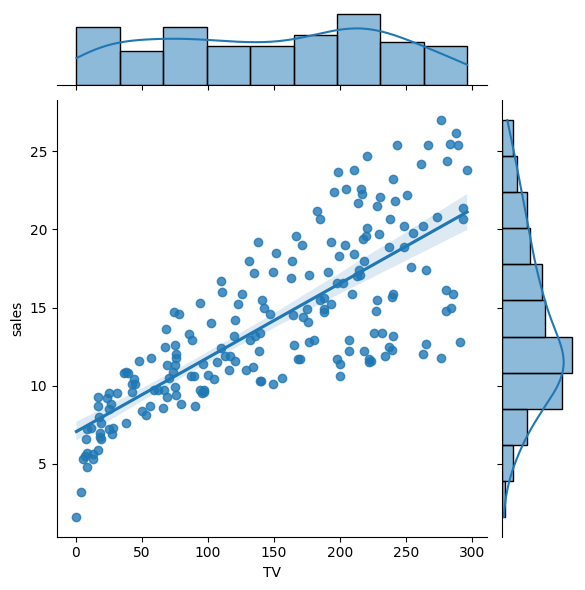

In [11]:
# regresyon doğrusu oluşturup bağlantıyı izleyelim.
sns.jointplot(x="TV", y= "sales",data=df ,kind="reg")

In [12]:
# satışlar ile tv arasındaki ilişki . tv ye yapılan reklam arttıkça satışlar yükselmiş doğrusal ve güçlü bir ilişki vardır.

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
X= df[["TV"]]

In [15]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [16]:
y= df[["sales"]]

In [17]:
reg = LinearRegression()

In [18]:
model= reg.fit(X,y)

In [19]:
model

LinearRegression()

In [20]:
str(model)

'LinearRegression()'

In [21]:
# B0 katsayısı sabit sayı
model.intercept_

array([7.03259355])

In [22]:
# B1 katsayısı
model.coef_


array([[0.04753664]])

In [23]:
# r kare bağımsız değişkenlerin bağımlı değişkenleri açıklama yüzdesidir.
model.score(X,y)

0.611875050850071

## MODEL TAHMİNİ

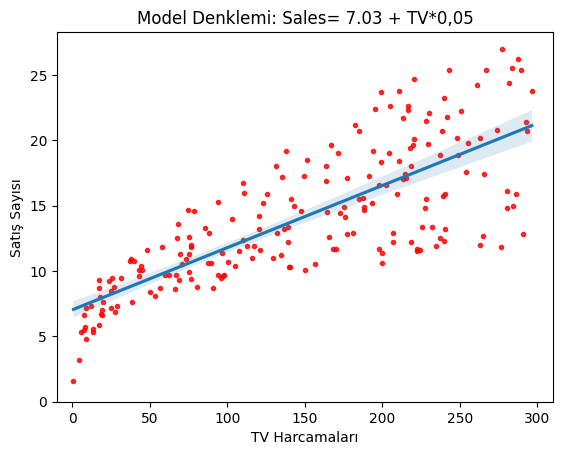

In [24]:
g = sns.regplot(x="TV", y="sales", data=df, scatter_kws={"color": "r", "s": 9})
g.set_title("Model Denklemi: Sales= 7.03 + TV*0,05")
g.set_ylabel("Satış Sayısı")
g.set_xlabel("TV Harcamaları")
plt.xlim(-10,310)
plt.ylim(bottom=0);

In [25]:
# aşağıdaki işlem regresyon çıktımız
model.intercept_ + model.coef_*165

array([[14.87613922]])

In [26]:
# y tahmini bulduk üst tarafta lakin daha kısa bir yolu var aşağıdaki gibi.
model.predict([[165]])

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[14.87613922]])

In [27]:
# belli değerleriniz var ise tanımlı aşağıdaki gibi yapabilirsiniz.
Yeni_değişken = [ [15],[5],[30]]

In [33]:
model.predict(Yeni_değişken)

C:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[7.74564316],
       [7.27027675],
       [8.45869276]])

# MSI: HATA KARELER ORTALAMASI
# RMSE: HATA KARELER ORTALAMASININ KARE KÖKÜ

In [35]:
Tahmin_Y= model.predict(X)[0:10]

In [39]:
gerçek_y = y[0:10]

In [40]:
gerçek_y

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
5,7.2
6,11.8
7,13.2
8,4.8
9,10.6


In [41]:
Tahmin_Y

array([[17.97077451],
       [ 9.14797405],
       [ 7.85022376],
       [14.23439457],
       [15.62721814],
       [ 7.44616232],
       [ 9.76595037],
       [12.74649773],
       [ 7.44140866],
       [16.53041431]])

In [42]:
tahmin_y= pd.DataFrame(Tahmin_Y)

In [43]:
hatalar= pd.concat([gerçek_y,tahmin_y], axis=1 )

In [44]:
hatalar

,sales,0
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [45]:
hatalar.columns=["Gerçek_Y", "Tahmin_Y"]

In [46]:
hatalar

,Gerçek_Y,Tahmin_Y
0,22.1,17.970775
1,10.4,9.147974
2,9.3,7.850224
3,18.5,14.234395
4,12.9,15.627218
5,7.2,7.446162
6,11.8,9.765950
7,13.2,12.746498
8,4.8,7.441409
9,10.6,16.530414


In [47]:
hatalar["Hatalar"] = hatalar["Gerçek_Y"] - hatalar["Tahmin_Y"]

In [48]:
hatalar

,Gerçek_Y,Tahmin_Y,Hatalar
0,22.1,17.970775,4.129225
1,10.4,9.147974,1.252026
2,9.3,7.850224,1.449776
3,18.5,14.234395,4.265605
4,12.9,15.627218,-2.727218
5,7.2,7.446162,-0.246162
6,11.8,9.765950,2.034050
7,13.2,12.746498,0.453502
8,4.8,7.441409,-2.641409
9,10.6,16.530414,-5.930414


In [50]:
hatalar["Hata_Kareler"]= hatalar["Hatalar"]**2

In [51]:
hatalar

,Gerçek_Y,Tahmin_Y,Hatalar,Hata_Kareler
0,22.1,17.970775,4.129225,17.050503
1,10.4,9.147974,1.252026,1.567569
2,9.3,7.850224,1.449776,2.101851
3,18.5,14.234395,4.265605,18.195390
4,12.9,15.627218,-2.727218,7.437719
5,7.2,7.446162,-0.246162,0.060596
6,11.8,9.765950,2.034050,4.137358
7,13.2,12.746498,0.453502,0.205664
8,4.8,7.441409,-2.641409,6.977040
9,10.6,16.530414,-5.930414,35.169814


In [52]:
np.mean(hatalar["Hata_Kareler"])

9.290350329638102